# exo cadre

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.__version__

'1.23.2'

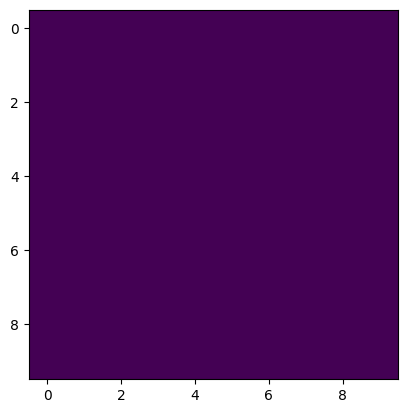

In [20]:
square = np.ones(shape=(10,10),dtype=bool)
result = plt.imshow(square)

In [21]:
def cadre(tab,*,inplace=True):
    n,p = np.shape(tab)
    if not inplace:
        new_tab = np.copy(tab)
    else:
        new_tab = tab
    
    new_tab[1,:] = np.zeros(shape=(1,p))
    new_tab[n-2,:] = np.zeros(shape=(1,p))
    new_tab[:,1] = np.zeros(shape=(1,n))
    new_tab[:,p-2] = np.zeros(shape=(1,n))
    
    if not inplace:
        return new_tab

# tests de cadre
- sur `square`, on vérifie si le résultat est correct et si le paramètre `inplace` fonctionne
- sur `random`, on vérifie de plus que le format rectangulaire est accepté

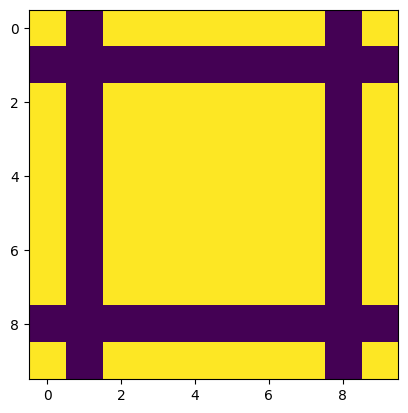

In [22]:
new_square = cadre(square,inplace=False)
result = plt.imshow(new_square)

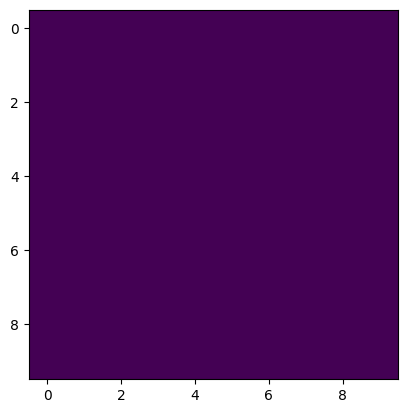

In [23]:
result = plt.imshow(square)

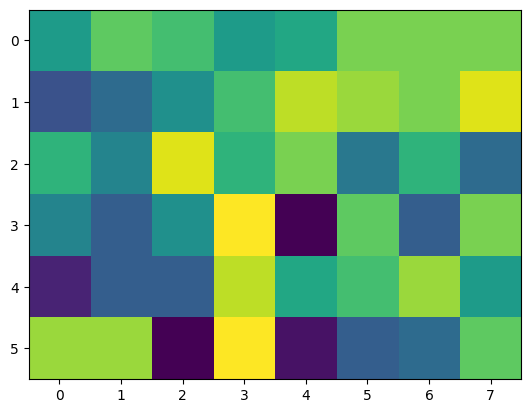

In [24]:
random = np.random.randint(0,21,(6,8),dtype=np.uint8)
result = plt.imshow(random)

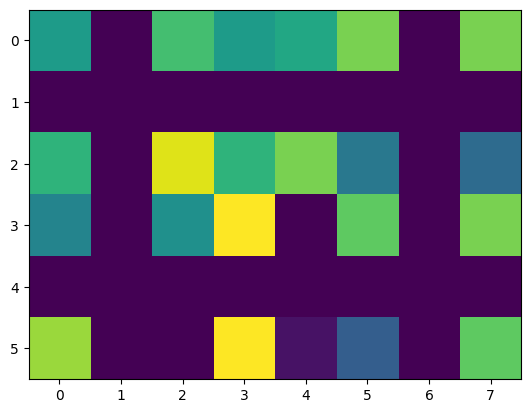

In [25]:
new_random = cadre(random,inplace=False)
result = plt.imshow(new_random)

# exo cadre2

In [26]:
def cadre2(tab):
    n,p = np.shape(tab)
    new_tab = np.resize(tab,(n+1,p+1))
    
    new_tab[0,:] = np.zeros(shape=(1,p+1))
    new_tab[n,:] = np.zeros(shape=(1,p+1))
    new_tab[:,0] = np.zeros(shape=(1,n+1))
    new_tab[:,p] = np.zeros(shape=(1,n+1))
    
    return new_tab
    

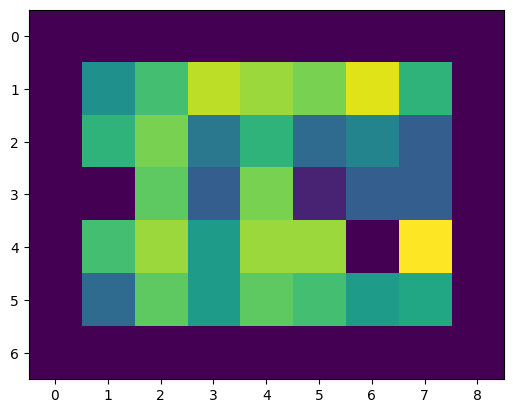

In [27]:
new_random2 = cadre2(random)
result = plt.imshow(new_random2)

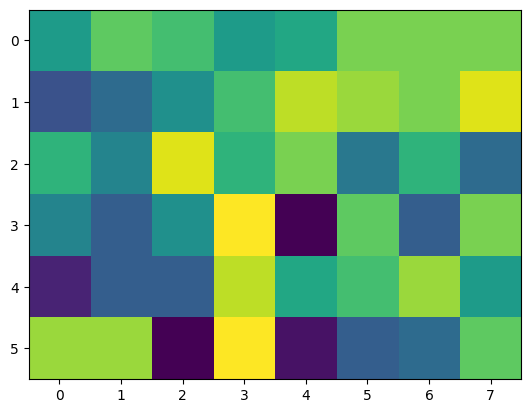

In [28]:
result = plt.imshow(random)

## modifier en place ?
Etant donné les outils qu'on a dans le cours : `np.resize` et `np.reshape`, je ne pense pas que `cadre2` puisse modifier un tableau en place. En effet, `np.resize` renvoie un nouveau tableau et `np.reshape` redimensionne le tableau sans changer son nombre d'éléments, or `cadre2` doit rajouter de nouvelles lignes et colonnes.

## tests possibles sur cadre2


# exo antidiagonal

## version avec un `for`, non vectorisée

In [29]:
def antidiag_for(l):
    n = len(l)
    square = np.zeros((n,n))
    for i in range(n):
        square[i,n-1-i] = l[i]
    return square
    

In [30]:
antidiag_for([1,2,3,4])

array([[0., 0., 0., 1.],
       [0., 0., 2., 0.],
       [0., 3., 0., 0.],
       [4., 0., 0., 0.]])

In [31]:
antidiag_for([0])

array([[0.]])

In [32]:
antidiag_for([0,1])

array([[0., 0.],
       [1., 0.]])

## version avec `for`, vectorisée

In [40]:
ind = np.indices((6,8))

In [42]:
ind

array([[[0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5, 5, 5]],

       [[0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7],
        [0, 1, 2, 3, 4, 5, 6, 7]]])

In [54]:
# création d'un tableau de coordonnées des cases

def tab_ind(n:int):
    res = np.empty((n,n),dtype=tuple)
    for i in range(n):
        for j in range(n):
            res[i,j] = (i,j)
    return res

In [66]:
obj = tab_ind(10)

In [68]:
obj[5,7]

(5, 7)

In [71]:
i,j = (5,7)
print(i,j)

5 7


In [80]:
# on utilise un for uniquement dans tab_ind

def antidiag(l):
    n = len(l)
    res = np.zeros((n,n))
    ind = tab_ind(n)
    print(ind)
    
    # fonction à vectoriser
    def fill_tab(elt:tuple) -> None:
        """s'applique au tableau d'indices ind, remplit le tableau res"""
        i,j = elt
        if i + j == n-1:
            res[i,n-1-i] = l[i]
    
    fill_tab_vect = np.vectorize(fill_tab)
    fill_tab_vect(ind)
    
    return res
    

In [82]:
antidiag(range(10))

[[(0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (0, 5) (0, 6) (0, 7) (0, 8) (0, 9)]
 [(1, 0) (1, 1) (1, 2) (1, 3) (1, 4) (1, 5) (1, 6) (1, 7) (1, 8) (1, 9)]
 [(2, 0) (2, 1) (2, 2) (2, 3) (2, 4) (2, 5) (2, 6) (2, 7) (2, 8) (2, 9)]
 [(3, 0) (3, 1) (3, 2) (3, 3) (3, 4) (3, 5) (3, 6) (3, 7) (3, 8) (3, 9)]
 [(4, 0) (4, 1) (4, 2) (4, 3) (4, 4) (4, 5) (4, 6) (4, 7) (4, 8) (4, 9)]
 [(5, 0) (5, 1) (5, 2) (5, 3) (5, 4) (5, 5) (5, 6) (5, 7) (5, 8) (5, 9)]
 [(6, 0) (6, 1) (6, 2) (6, 3) (6, 4) (6, 5) (6, 6) (6, 7) (6, 8) (6, 9)]
 [(7, 0) (7, 1) (7, 2) (7, 3) (7, 4) (7, 5) (7, 6) (7, 7) (7, 8) (7, 9)]
 [(8, 0) (8, 1) (8, 2) (8, 3) (8, 4) (8, 5) (8, 6) (8, 7) (8, 8) (8, 9)]
 [(9, 0) (9, 1) (9, 2) (9, 3) (9, 4) (9, 5) (9, 6) (9, 7) (9, 8) (9, 9)]]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 0., 0., 0.],
       [0., 0., 0., 0., 0., 4., 0., 0., 0., 0.],
       [0., 0., 0., 0., 5., 0., 0., 0., 0., 0.],
       [0., 0., 0., 6., 0., 0., 0., 0., 0., 0.],
       [0., 0., 7., 0., 0., 0., 0., 0., 0., 0.],
       [0., 8., 0., 0., 0., 0., 0., 0., 0., 0.],
       [9., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## version sans `for`, vectorisée
on souhaite écrire `tab_ind` sans `for`

In [90]:
x = range(10)
y = range(9,-1,-1)
res = list(zip(x,y))

In [92]:
res

[(0, 9),
 (1, 8),
 (2, 7),
 (3, 6),
 (4, 5),
 (5, 4),
 (6, 3),
 (7, 2),
 (8, 1),
 (9, 0)]

In [98]:
grid = np.indices((6,8))
grid[1]

array([[0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7],
       [0, 1, 2, 3, 4, 5, 6, 7]])

j'ai pensé à utiliser la fonction zip mais je n'y arrive pas sans `for`